Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


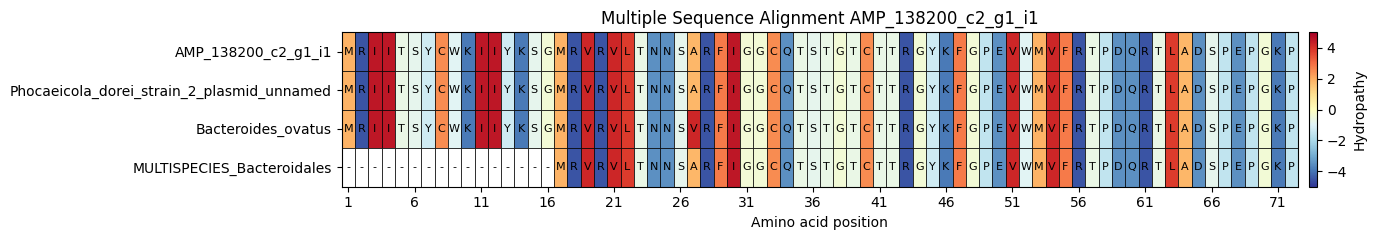

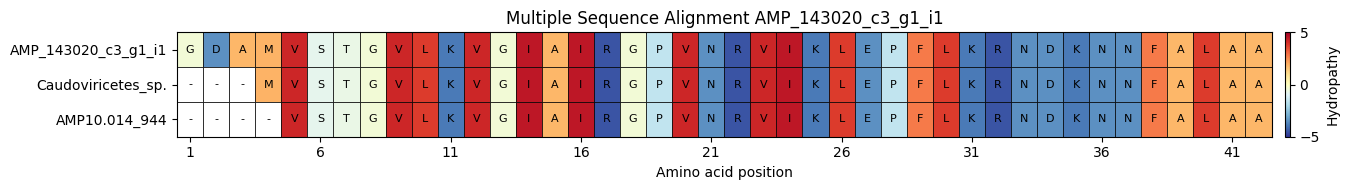

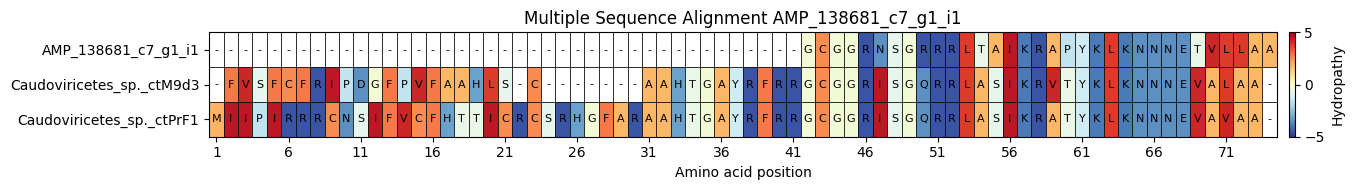

In [1]:
%pip install matplotlib seaborn biopython
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import AlignIO

def plot_msa(input, format='fasta', title=''):
    # Read the alignment file
    alignment = AlignIO.read(input, format)

    # Hydropathy dictionary
    hydropathy = {
        'I': 4.5, 'V': 4.2, 'L': 3.8, 'F': 2.8, 'C': 2.5,
        'M': 1.9, 'A': 1.8, 'G': -0.4, 'T': -0.7, 'S': -0.8,
        'W': -0.9, 'Y': -1.3, 'P': -1.6, 'H': -3.2, 'E': -3.5,
        'Q': -3.5, 'D': -3.5, 'N': -3.5, 'K': -3.9, 'R': -4.5,
        '-': 0  # Neutral value for gaps
    }

    import matplotlib.colors as mcolors
    cmap = plt.get_cmap('RdYlBu_r')  # Red for hydrophobic, blue for hydrophilic
    norm = mcolors.Normalize(vmin=-5, vmax=5)  # Normalize to the range of hydropathy values
    
    # Create a sequence alignment matrix
    alignment_matrix = []
    for record in alignment:
        alignment_matrix.append(list(record.seq))
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(15, len(alignment) / 2 + 0.5))

    # Plot the alignment matrix
    # Plot the alignment matrix
    for i, row in enumerate(alignment_matrix):
        for j, char in enumerate(row):
            ax.text(j, i, char, ha='center', va='center', fontsize=8, color='black')
            if char == '-':
                color = 'white'
            else:
                color = cmap(norm(hydropathy[char]))
            ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, edgecolor='black', lw=0.5, facecolor=color))

    # Set plot limits and labels
    ax.set_xlim(-0.5, len(alignment_matrix[0]) - 0.5)
    ax.set_ylim(-0.5, len(alignment_matrix) - 0.5)

    # Calculate the minimum, maximum, and step for the x-axis
    x_min = 0
    x_max = len(alignment_matrix[0])
    x_step = 5

    # Set the x-axis ticks and labels
    ax.set_xticks(range(x_min, x_max + 1, x_step))
    ax.set_xticklabels(range(x_min + 1, x_max + 2, x_step))

    ax.set_yticks(range(len(alignment_matrix)))
    ax.set_yticklabels([record.id for record in alignment], fontsize=10)

    ax.invert_yaxis()

    # Create a colorbar
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', pad=0.01)
    cbar.set_label('Hydropathy')

    plt.xlabel('Amino acid position')
    plt.ylabel('')
    plt.title('Multiple Sequence Alignment ' + title)

    # Create svg and png
    fig.tight_layout()  # Add this line
    fig.savefig(input + '.svg', format='svg')
    fig.savefig(input + '.png', format='png')
    plt.show()
    
# Plot the MSA
plot_msa('./AMP_138200_c2_g1_i1_pep_filt.aln',
         title='AMP_138200_c2_g1_i1')

plot_msa('./AMP_143020_c3_g1_i1_pep_filt.aln',
         title='AMP_143020_c3_g1_i1')

plot_msa('./AMP_138681_c7_g1_i1_pep_filt.aln',
         title='AMP_138681_c7_g1_i1')